# Ноутбук с моделью

## Импортируем необходимые пакеты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from itertools import product

## Считываем данные в датафреймы

In [2]:
# Загружаем первый датасет
df_1 = pd.read_csv('data/ga_hits-002.csv')
df_1

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [3]:
# Загружаем второй датасет
df_2 = pd.read_csv('data/ga_sessions.csv')
df_2.head()

C:\Users\Илья\AppData\Local\Temp\ipykernel_7808\1633830667.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('data/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


## EDA

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [4]:
# Смотрим общие статистики
columns = df_1.columns
for column in columns:
    print(df_1[column].describe())
    print('        ')

count                                      15726470
unique                                      1734610
top       5442565791571325612.1632449195.1632449195
freq                                            768
Name: session_id, dtype: object
        
count       15726470
unique           226
top       2021-05-24
freq          513035
Name: hit_date, dtype: object
        
count    6.566148e+06
mean     2.091050e+05
std      4.032110e+05
min      0.000000e+00
25%      2.412000e+04
50%      8.994100e+04
75%      2.195352e+05
max      1.315688e+07
Name: hit_time, dtype: float64
        
count    1.572647e+07
mean     2.356715e+01
std      2.887713e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      5.000000e+02
Name: hit_number, dtype: float64
        
count     15726470
unique           1
top          event
freq      15726470
Name: hit_type, dtype: object
        
count                  9451666
unique                   37873
top       HbolMJU

In [5]:
# Проверим датасет на наличие пропусков
df_1.isna().sum()

session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

In [7]:
# проверяем датасет на наличие дубликатов
df_1.duplicated().sum()

0

In [4]:
# По условию задания, для предсказания результата модель должна брать на вход все атрибуты, типа utm_*, device_*, geo_*, 
# поэтому из датасете ga_hits необходимо будет взять только таргет. Остальные признаки необходимо удалить

In [6]:
# Целевые действия находятся в колонке event_action. Создадим новую колонку target, на основе event_action согласно 
# условию задачи
# Функция для создания колонки target
def identify_target(input_event):
    if input_event.strip().lower() in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
                                       'sub_open_dialog_click', 'sub_custom_question_submit_click', 
                                       'sub_call_number_click', 'sub_callback_submit_click', 
                                       'sub_submit_success', 'sub_car_request_submit_click']:
        return 1
    else:
        return 0

In [7]:
df_1['target'] = [*map(identify_target, df_1['event_action'].values)]
df_1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,target
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN,0
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN,0
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN,0


In [8]:
df_1['target'].value_counts()

target
0    15621562
1      104908
Name: count, dtype: int64

In [17]:
cols_to_drop = list(df_1.columns)
cols_to_drop.remove('session_id')
cols_to_drop.remove('target')
cols_to_drop

['hit_date',
 'hit_time',
 'hit_number',
 'hit_type',
 'hit_referer',
 'hit_page_path',
 'event_category',
 'event_action',
 'event_label',
 'event_value']

In [18]:
df_1_cleared = df_1.drop(cols_to_drop, axis=1)
df_1_cleared.head()

,session_id,target
0,5639623078712724064.1640254056.1640254056,0
1,7750352294969115059.1640271109.1640271109,0
2,885342191847998240.1640235807.1640235807,0
3,142526202120934167.1640211014.1640211014,0
4,3450086108837475701.1640265078.1640265078,0


In [19]:
# Группируем данные с агрегацией по max
df_1_prepared = df_1_cleared.groupby('session_id').agg('max')
df_1_prepared.shape

(1734610, 1)

In [9]:
# проведем анализ второго датасета
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [10]:
# Смотрим общие статистики
columns = df_2.columns
for column in columns:
    print(df_2[column].describe())
    print('        ')

count                                       1860042
unique                                      1860042
top       9055434745589932991.1637753792.1637753792
freq                                              1
Name: session_id, dtype: object
        
count     1.860042e+06
unique    1.391717e+06
top       1.750498e+09
freq      4.620000e+02
Name: client_id, dtype: float64
        
count        1860042
unique           226
top       2021-05-24
freq           39453
Name: visit_date, dtype: object
        
count      1860042
unique       85318
top       12:00:00
freq         61067
Name: visit_time, dtype: object
        
count    1.860042e+06
mean     2.712804e+00
std      1.182907e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.640000e+02
Name: visit_number, dtype: float64
        
count                  1859945
unique                     293
top       ZpYIoDJMcFzVoPFsHGJL
freq                    578290
Name: utm_source, dtype: object


In [11]:
# проверяем датасет на наличие дубликатов
df_2.duplicated().sum()

0

In [36]:
# Проверим датасет на наличие пропусков
(df_2.isna().sum() / len(df_2)) * 100

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64

In [20]:
# Удалим признак 'client_id', поскольку он уникален и не поможет в классификации
# Также удалим колонку 'device_model', поскольку она практически пустая
# Кроме того, удалим колонки visit_date, visit_time, visit_number т.к. они не участвуют в предсказании 
df_2_cleared = df_2.drop(['client_id', 'device_model', 'visit_date', 'visit_time', 'visit_number'], axis=1)
df_2_cleared.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow


In [23]:
# Объединим датафреймы для дальнейшего анализа и обработки
df = pd.merge(left=df_2_cleared, right=df_1_prepared, on='session_id', how='inner')
df.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 14 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   utm_source                object
 2   utm_medium                object
 3   utm_campaign              object
 4   utm_adcontent             object
 5   utm_keyword               object
 6   device_category           object
 7   device_os                 object
 8   device_brand              object
 9   device_screen_resolution  object
 10  device_browser            object
 11  geo_country               object
 12  geo_city                  object
 13  target                    int64 
dtypes: int64(1), object(13)
memory usage: 185.0+ MB


In [25]:
# Посмотрим процент пропущенных значений в каждой категории
(df.isna().sum() / len(df)) * 100

session_id                   0.000000
utm_source                   0.004387
utm_medium                   0.000000
utm_campaign                11.273500
utm_adcontent               17.557177
utm_keyword                 58.925823
device_category              0.000000
device_os                   58.533966
device_brand                20.042880
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
target                       0.000000
dtype: float64

In [7]:
# Для дальнейшего анализа данных, а также для экономии памяти, проведем некоторые преобразования

In [26]:
# Сохраним данные в файл
df.to_csv('data/df.csv', index=False)

In [2]:
df = pd.read_csv('data/df.csv')
df.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [27]:
df.columns

Index(['session_id', 'utm_source', 'utm_medium', 'utm_campaign',
       'utm_adcontent', 'utm_keyword', 'device_category', 'device_os',
       'device_brand', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target'],
      dtype='object')

In [29]:
# Посмотрим процент каких значения в категориальных признаках больше 2.
columns = [
    'utm_source', 'utm_medium', 'utm_campaign',
    'utm_adcontent', 'utm_keyword', 'device_category', 'device_os',
    'device_brand', 'device_browser', 'geo_country', 'geo_city'
]
for col in columns:
    serie = df[col].value_counts()
    serie = serie / serie.sum() * 100    
    print(f'{col}:')
    print(f'{serie[serie > 2]}')
    print('   ')

utm_source:
utm_source
ZpYIoDJMcFzVoPFsHGJL    31.899214
fDLlAcSmythWSCVMvqvL    15.994781
kjsLglQLzykiRbcDiGcD    14.154221
MvfHsxITijuriZxsqZqt    10.150792
BHcvLfOaCWvWTykYqHVe     6.405937
bByPQxmDaMXgpHeypKSM     5.216287
QxAxdyPLuQMEcrdZWdWb     2.613281
Name: count, dtype: float64
   
utm_medium:
utm_medium
banner      30.319016
cpc         23.056217
(none)      15.994079
cpm         13.265341
referral     7.900115
organic      3.175552
Name: count, dtype: float64
   
utm_campaign:
utm_campaign
LTuZkdKfxRGVceoWkVyg    27.521001
LEoPHuyFvzoNfnzGgfcd    20.903734
FTjNLDyTrXaWYgZymFkV    15.286481
gecBYcKZCPMcVYdSSzKP     8.669409
Name: count, dtype: float64
   
utm_adcontent:
utm_adcontent
JNHcPlZPxEMWDnRiyoBf    65.498845
vCIpmpaGBnIQhyYNkXqp    12.564551
xhoenQgDQsgfEPYNPwKO     7.308934
PkybGvWbaqORmxjNunqZ     4.133940
Name: count, dtype: float64
   
utm_keyword:
utm_keyword
puhZPIYqKXeFPaUviSjo    65.487116
aXQzDWsJuGXeBXexNHjc     2.551461
Name: count, dtype: float64
   
dev

In [22]:
# Проверим тип данных в признаке device_screen_resolution
type(df_cleared.loc[0, 'device_screen_resolution'])

str

In [7]:
# Основные выводы
# Данные в целевой переменной несбалансированы
# Необходимо изменить тип данных в признаке device_screen_resolution
# Признак geo_country в какой-то мере повторяет информацию в признаке geo_city. Москва и Санкт-Петербург - это города
# в России. Нет необходимости уточнять страну, поэтому данный признак можно будет удалить
# Признак session_id также, как и client_id является уникальным и не помогут в классификации, поэтому его нужно
# будет также удалить
# В признаках есть пропуски, их необходимо обработать.
# Многие категориальные признаки принимают очень много уникальных значений. Их необходимо объединить в одну категорию,
# например, other.

## Data Preparation

In [30]:
# Удаляем ненужные признаки
df_prepared = df.drop(['session_id', 'geo_country'], axis=1)
df_prepared.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Zlatoust,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Moscow,0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Krasnoyarsk,0
3,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Moscow,0
4,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Moscow,0


In [11]:
# Сохраним данные в файл
df_prepared.to_csv('data/df_prepared.csv', index=False)

In [11]:
df_prepared = pd.read_csv('data/df_prepared.csv')
df_prepared.head()

In [61]:
# Разделим данные на тренировочную и тестовую выборку
RANDOM_SEED = 1

df_train, df_test = train_test_split(
    df_prepared, stratify=df_prepared['target'], test_size=0.2, random_state=RANDOM_SEED
)

In [62]:
# Приведем тип данных в признаке 'device_screen_resolution' к типу int
def resolution_type(df):

    df['device_screen_resolution'] = df['device_screen_resolution'].apply(
        lambda x: (int(x.split('x')[0]) * int(x.split('x')[1]))
    )
    return df

In [63]:
df_train = resolution_type(df_train)
df_test = resolution_type(df_test)

In [64]:
# Заменяем пропуски. Поскольку пропусков много, мы не будем их удалять, заменим пропуски на значение 'unknown'

def fill_unknown(df):
    
    imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')
    unk_cols = df.select_dtypes(include=['object']).columns
    df[unk_cols] = imp_const_unknown.fit_transform(df[unk_cols])
    
    return df

In [65]:
df_train = fill_unknown(df_train)
df_test = fill_unknown(df_test)

In [104]:
# Выведем целевую переменную в отдельный датафрейм
def target_separation(df_train, df_test):
    
    X_train, y_train = df_train.drop(['target'], axis=1), df_train['target']
    X_test, y_test = df_test.drop(['target'], axis=1), df_test['target']
    
    return X_train, y_train, X_test, y_test

In [105]:
X_train, y_train, X_test, y_test = target_separation(df_train, df_test)

In [106]:
# Проведем нормализацию данных в обучающей и тестовой выборках. Целевую переменную нормализовывать не будем.
# Выбираем метод стандартизации

def data_norm(df):
    
    scaler = StandardScaler()
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[num_columns] = pd.DataFrame(scaler.fit_transform(df[num_columns]), columns=num_columns, index=df.index)
    
    return df

In [107]:
X_train = data_norm(X_train)
X_test = data_norm(X_test)

In [108]:
X_train.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_city
1654197,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,COtBsnAzfZyRVtvDlhnW,mobile,Android,LG,-0.342964,Chrome,Ruza
188942,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,QCjbxkecYPvHpsJxBXej,unknown,desktop,unknown,unknown,2.075234,YaBrowser,Saint Petersburg
1548740,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,unknown,desktop,unknown,unknown,1.177178,Chrome,Moscow
1590130,BHcvLfOaCWvWTykYqHVe,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown,mobile,unknown,Xiaomi,-0.389824,YaBrowser,Moscow
560279,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown,mobile,unknown,Huawei,-0.465857,Chrome,Irkutsk


In [109]:
# Закодируем категориальные признаки

def cat_coding(df):
    
    ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', min_frequency=0.02)
    cat_columns = df.select_dtypes(include=['object']).columns
    encoded_features = ohe.fit_transform(df[cat_columns])
    df_encoded_features = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out())
    # Удаляем ненужные колонки
    df_encoded_features.index = df.index
    df_encoded = pd.concat([df, df_encoded_features], axis=1).drop(cat_columns, axis=1)
        
    return df_encoded

In [110]:
X_train = cat_coding(X_train)
X_test = cat_coding(X_test)

In [111]:
X_train.head()

,device_screen_resolution,utm_source_MvfHsxITijuriZxsqZqt,utm_source_QxAxdyPLuQMEcrdZWdWb,utm_source_ZpYIoDJMcFzVoPFsHGJL,utm_source_bByPQxmDaMXgpHeypKSM,utm_source_fDLlAcSmythWSCVMvqvL,utm_source_kjsLglQLzykiRbcDiGcD,utm_source_infrequent_sklearn,utm_medium_banner,utm_medium_cpc,...,device_brand_infrequent_sklearn,device_browser_Chrome,device_browser_Safari,device_browser_Safari (in-app),device_browser_Samsung Internet,device_browser_YaBrowser,device_browser_infrequent_sklearn,geo_city_Moscow,geo_city_Saint Petersburg,geo_city_infrequent_sklearn
1654197,-0.342964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188942,2.075234,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1548740,1.177178,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1590130,-0.389824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
560279,-0.465857,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# Сохраним данные в файл
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

NameError: name 'X_train' is not defined

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

## Modeling

In [113]:
RANDOM_SEED = 1

In [114]:
# Пробуем модель логистической регрессии
logreg = LogisticRegression(class_weight='balanced',
                            random_state=RANDOM_SEED, 
                            max_iter=2000)           # max_iter нужен для сходимости

In [115]:
# проведем кросс-валидацию модели на тренировочной выборке
score = cross_val_score(
    logreg,
    X_train,
    y_train,                         
    scoring='roc_auc',
    cv=4, 
    n_jobs=-1
)
print(f'roc_auc_mean: {score.mean():.4f}, roc_auc_std: {score.std():.4f}')

roc_auc_mean: 0.6645, roc_auc_std: 0.0006


In [116]:
logreg.fit(X_train, np.ravel(y_train)) # np.ravel нужен для избежания появления warning
pred_logreg = logreg.predict_proba(X_test)[:, 1]
roc_logreg = roc_auc_score(y_test, pred_logreg) # метрика roc_auc на тестовой выборке
print(f'roc_auc: {roc_logreg:.4f}')

roc_auc: 0.6657


Text(0, 0.5, 'tpr')

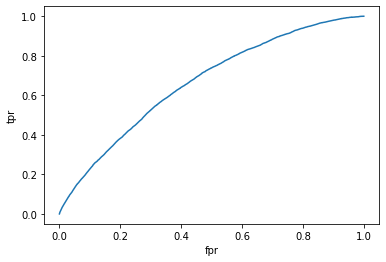

In [117]:
# Изобразим полученную кривую roc
fpr, tpr, _ = roc_curve(y_test, pred_logreg)
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [118]:
# Пробуем модель случайного леса
forest = RandomForestClassifier(class_weight='balanced',
                            random_state=RANDOM_SEED)

In [119]:
score = cross_val_score(
    forest,
    X_train,
    y_train,                         
    scoring='roc_auc',
    cv=4, 
    n_jobs=-1
)
print(f'roc_auc_mean: {score.mean():.4f}, roc_auc_std: {score.std():.4f}')

roc_auc_mean: 0.6373, roc_auc_std: 0.0025


In [120]:
forest.fit(X_train, np.ravel(y_train))
pred_forest = forest.predict_proba(X_test)[:,1]
roc_forest = roc_auc_score(y_test, pred_forest) # метрика roc_auc на тестовой выборке
print(f'roc_auc: {roc_forest:.4f}')

roc_auc: 0.6291


In [13]:
# Пробуем модель MLP
RANDOM_SEED=1
MLP_model = MLPClassifier(random_state=RANDOM_SEED, activation='logistic', max_iter=2000)

In [14]:
# проведем кросс-валидацию модели на тренировочной выборке
score = cross_val_score(
    MLP_model,
    X_train,
    y_train,                         
    scoring='roc_auc',
    cv=4, 
    n_jobs=-1
)
print(f'roc_auc_mean: {score.mean():.4f}, roc_auc_std: {score.std():.4f}')

roc_auc_mean: 0.6757, roc_auc_std: 0.0013


In [15]:
MLP_model.fit(X_train, np.ravel(y_train))
pred_MLP = MLP_model.predict_proba(X_test)[:,1]
roc_MLP = roc_auc_score(y_test, pred_MLP) # метрика roc_auc на тестовой выборке
print(f'roc_auc: {roc_MLP:.4f}')

roc_auc: 0.6780


In [5]:
# Наибольшее значение roc_auc показала модель MLP. Выберем ее в качестве базовой и Попробуем потюнить данную модель

In [3]:
first_layer_neurons = np.arange(150, 201, 50)
second_layer_neurons = np.arange(50, 201, 50)
hidden_layer_sizes = list(product(first_layer_neurons, second_layer_neurons))

In [6]:
# Подбираем гиперпараметры для многослойного персептрона. Применим GridSearchCV
# Инициализируем сетку параметров для перебора
params = {    
    'hidden_layer_sizes': hidden_layer_sizes    
}
# Инициализируем базовую модель
random_seed = 1
MLP_model = MLPClassifier(
    random_state=random_seed, max_iter=2000, learning_rate_init=0.002, learning_rate='adaptive', activation='logistic'
)
# Модель для перебора параметров базовой модели
grid_search_MLP = GridSearchCV(
    estimator=MLP_model,
    param_grid=params,
    scoring='roc_auc',
    cv=3,    
    n_jobs=-1
)
# Выполняем перебор параметров
grid_search_MLP.fit(X_train, np.ravel(y_train))  # np.ravel нужен для избежания появления warning
# Выводим лучшие параметры и метрику
best_params = grid_search_MLP.best_params_
best_score = grid_search_MLP.best_score_
print(best_params)
print(best_score)

{'hidden_layer_sizes': (150, 50)}
0.6782505083123184


In [7]:
# Теперь обучим модель с подобранными гиперпараметрами и вычислим метрику roc_auc на тестовой выборке
RANDOM_SEED=1
MLP_model = MLPClassifier(
    random_state=RANDOM_SEED, activation='logistic', max_iter=2000, hidden_layer_sizes=(150, 50), learning_rate_init=0.002, learning_rate='adaptive'
)

In [8]:
MLP_model.fit(X_train, np.ravel(y_train))
pred_MLP = MLP_model.predict_proba(X_test)[:,1]
roc_MLP = roc_auc_score(y_test, pred_MLP) # метрика roc_auc на тестовой выборке
print(f'roc_auc: {roc_MLP:.4f}')

roc_auc: 0.6800


## Results

In [9]:
# Согласно наилучшей моделью для предсказания является модель многослойного персептрона
# Метрика roc_auc для данной модели на тестовой выборке составляет 0.68
# Согласно значению метрики roc_auc при кросс-валидации и тестовой выбрке, можно сделать вывод о том, что модель 
# не переобучена